# Pre-Processing and Training Data

# 1.1 Contents<a id='1.1_Contents'></a>
* [1 Pre-Processing and Training Data](#1_Pre-Processing_and_Training_Data)
  * [1.1 Problem Statement](#1.1_Problem_Statement)
  * [1.2 Imports](#1.2_Imports)
  * [1.3 Sourcing and Loading](#1.3_Sourcing_and_Loading)
      * [1.3.1 Load the Data](#1.3.2_Load_the_Data)
      * [1.3.2 Explore the Data](#1.3.2_Explore_the_Data)
      * [1.3.3 Filtering Down to One Location](#1.3.3_Filtering_Down_to_One_Location)
  * [2.1 Transforming and Visualizing](#2.1_Transforming_and_Visualizing)
      * [2.1.1 Setting Date as Index](#2.1.1_Setting_Date_as_Index)
      * [2.1.1 Making a Predictor Value y](#2.1.1_Making_a_Predictor_Value_y)

## 1.1 Problem Statement

Now that we know there is no missing data and we have all the data we need, we will start making models with one store location. I am interested in 3351 - Albuquerque, NM (XF) because it is one of the busiest stores in the nation. Once we have built a model that fits our requirements, we will move to modeling.

## 1.2 Imports

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import datetime

## 1.3 Sourcing and Loading

### 1.3.1 Load the Data

In [80]:
df = pd.read_excel(r'/Users/Alan/Library/CloudStorage/OneDrive-Comcast/Python/Springboard/Data Wrangling.xlsx')
df.head().T

,0,1,2,3,4
Traffic_Date,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00,2014-12-22 00:00:00
STORE_NAME,"3351 - Albuquerque, NM (XF)","3352 - Lakewood, CO (XF)","3353 - Colorado Springs, CO (XF)","3354 - Thornton, CO (XF)","3356 - Boulder, CO (XF)"
STORE_CITY_NAME,Albuquerque,Lakewood,Colorado Springs,Thornton,Boulder
STORE_STATE_CODE,NM,CO,CO,CO,CO
Door_Swings,656,452,562,594,369


In [81]:
df.rename(columns={'STORE_NAME' : 'store_name', 'Traffic_Date' : 'date', 'STORE_CITY_NAME' : 'city', 'STORE_STATE_CODE' : 'state','Door_Swings' : 'door_swings'}, inplace=True)

### 1.3.2 Explore the Data

In [82]:
df.head()

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
1,2014-12-22,"3352 - Lakewood, CO (XF)",Lakewood,CO,452
2,2014-12-22,"3353 - Colorado Springs, CO (XF)",Colorado Springs,CO,562
3,2014-12-22,"3354 - Thornton, CO (XF)",Thornton,CO,594
4,2014-12-22,"3356 - Boulder, CO (XF)",Boulder,CO,369


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74789 entries, 0 to 74788
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         74789 non-null  datetime64[ns]
 1   store_name   74789 non-null  object        
 2   city         74789 non-null  object        
 3   state        74789 non-null  object        
 4   door_swings  74789 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.9+ MB


In [84]:
df.dtypes

date           datetime64[ns]
store_name             object
city                   object
state                  object
door_swings             int64
dtype: object

In [85]:
df.isnull().values.any()

False

### 1.3.3 Filtering Down to One Location

In [86]:
a3351 = df[df.store_name == '3351 - Albuquerque, NM (XF)']

In [87]:
a3351.head()

,date,store_name,city,state,door_swings
0,2014-12-22,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,656
9,2014-12-23,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,612
18,2014-12-24,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,354
27,2014-12-25,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,0
36,2014-12-26,"3351 - Albuquerque, NM (XF)",Albuquerque,NM,819


## 2.1 Transforming and Visualizing

### 2.1.1 Setting Date as Index

I will now filter it down to the date and door swings since we know this new data frame contains all of Albuquerque's door swings.

In [88]:
a3351 = a3351.drop(['store_name', 'city', 'state'],axis=1)

In [89]:
a3351['date'] = pd.to_datetime(a3351['date'])
a3351.set_index('date', inplace = True)

In [90]:
a3351.head()

,door_swings
date,
2014-12-22,656
2014-12-23,612
2014-12-24,354
2014-12-25,0
2014-12-26,819


In [91]:
a3351.dtypes

door_swings    int64
dtype: object

In [92]:
a3351.

SyntaxError: invalid syntax (681774282.py, line 1)

### 2.1.2 Making a Predictor Value `y`

In [93]:
y = a3351['door_swings']

### 2.1.3 Getting Summary Statistics for `y`

In [94]:
a3351.describe()

,door_swings
count,2841.000000
mean,609.357621
std,203.027675
min,0.000000
25%,522.000000
50%,619.000000
75%,729.000000
max,1291.000000


<AxesSubplot:xlabel='date'>

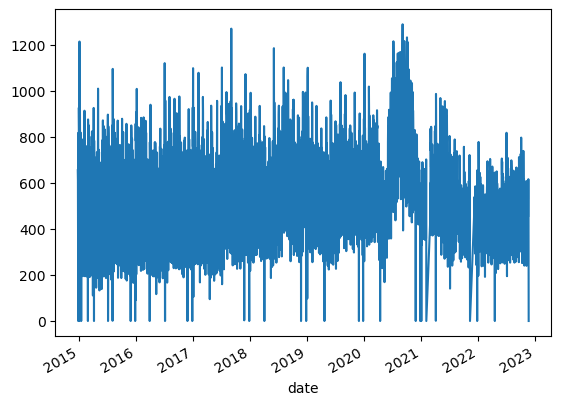

In [95]:
y.plot()

Interestingly, we had a huge spike in 2020 during the pandemic.

## 3.1 Modeling

### 3.1.1 Decomposition

In [106]:
y = y.fillna(method='bfill').fillna(method='ffill')

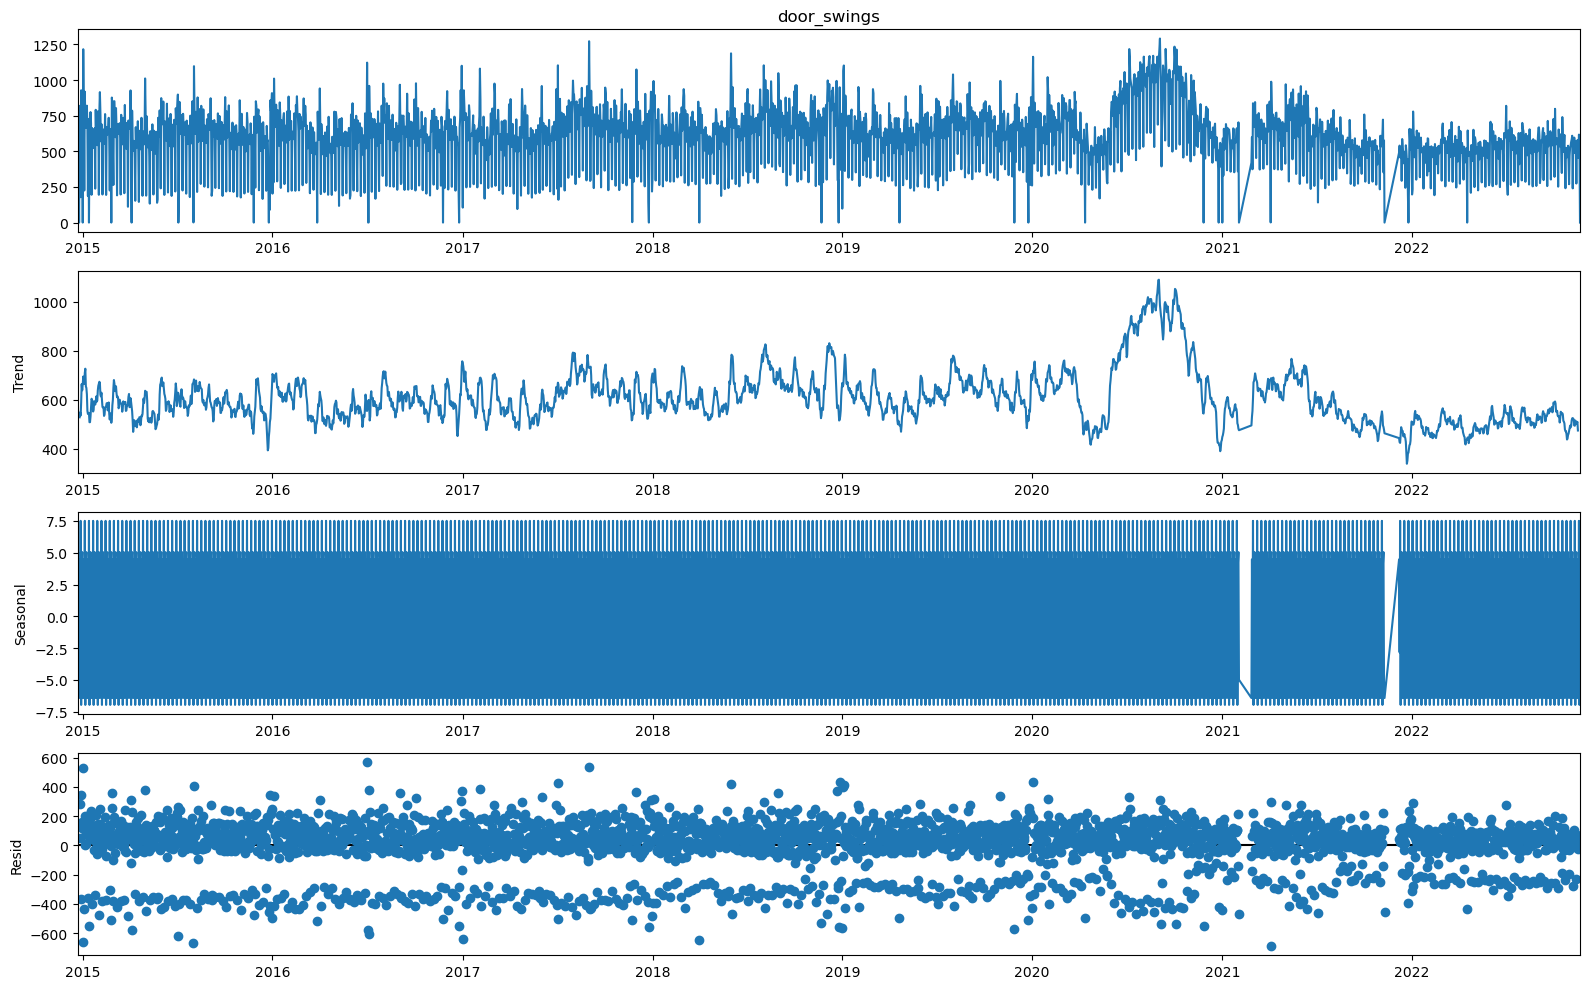

In [115]:
import statsmodels.api as sm

decomp = sm.tsa.seasonal_decompose(y, model='additive', period=8)
fig = decomp.plot()
fig.set_size_inches((16, 10))
fig.tight_layout()
plt.show()

### 3.1.2 Testing for Stationarity with KPSS

In [116]:
from statsmodels.tsa.stattools import kpss

kpss(y)

(0.6891838928357528,
 0.014528737014931565,
 24,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

### 3.1.3 Making the Data Stationary

<AxesSubplot:xlabel='date'>

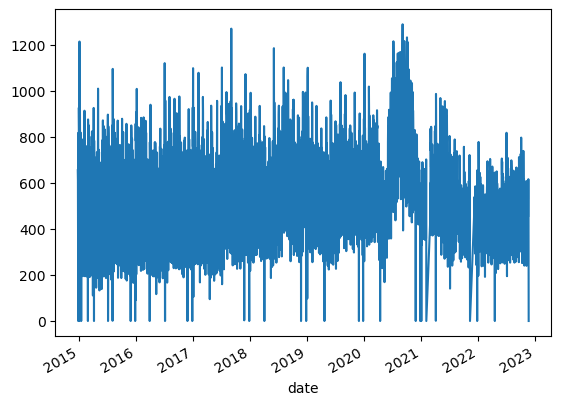

In [117]:
y.plot()

In [118]:
y_log = np.log(y)

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='date'>

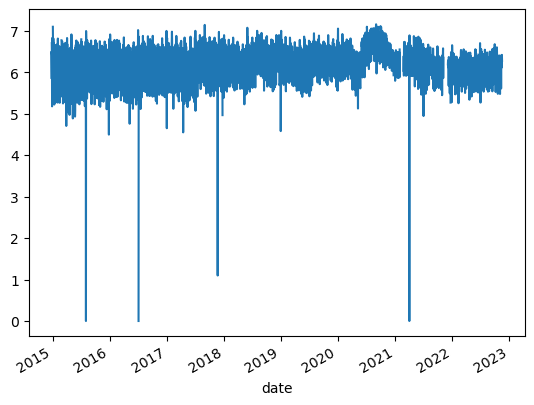

In [119]:
y_log.plot()

In [120]:
kpss(y_log.diff().dropna())

/Users/Alan/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


ValueError: cannot convert float NaN to integer